In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32)) #10000: input vector의 차원수 / 32: 임베딩 벡터의 차원수 
model.add(SimpleRNN(32))  #output feature의 개수 #hidden layer의 node 개수 (하나의 노드가 feature로 인식됨)
model.summary() #->weight 32*32(input과 hidden layer 사이에)+32*32(hidden layer내에서)+32(bias)

##이렇게 한 후에 output shape는?(시험문제) 32개 차원의 embedded 벡터가 input_length만큼 나옴 
#output shape: input_length*32 #input_length는 하나의 문서당 대표단어 개수!

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) #return_sequences: final 파트에 있는 값만 쓰는게 아니라 다 쓰겠다!(many to one 구조에서)
model.summary()
#return_sequences 5부 p.18그림으로 확인!

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))  #출력을 또 입력 삼아서 또 학습 stack이라고 생각!
model.add(SimpleRNN(32, return_sequences=True))  #return_sequences: 각 layer에서 나온 값을 다 써서! 모든 출력!
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.  #마지막 층에서는 마지막 output만 쓰겠다
model.summary()
#모르겠으면 5부 p.18확인.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) #500개만큼씩만 정수 데이터로 바꾸기!
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid')) #rnn에서 학습된  결과를 dnn에 접목 output node는 1개! binary 문제이기 때문! 
#긍 or부 문제니까!
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2) #validate accuracy 0.8

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6403 - acc: 0.6143 - val_loss: 0.4630 - val_acc: 0.8088
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.4029 - acc: 0.8299 - val_loss: 0.3825 - val_acc: 0.8418
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.3183 - acc: 0.8706 - val_loss: 0.4239 - val_acc: 0.8086
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2328 - acc: 0.9110 - val_loss: 0.3815 - val_acc: 0.8452
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1715 - acc: 0.9358 - val_loss: 0.3875 - val_acc: 0.8700
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1196 - acc: 0.9581 - val_loss: 0.4404 - val_acc: 0.8252
Epoch 7/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.0805 - acc: 0.9748 - val_loss: 0.4581 - val_acc:

In [7]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.5083 - acc: 0.7636 - val_loss: 0.4276 - val_acc: 0.8018
Epoch 2/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.2931 - acc: 0.8860 - val_loss: 0.4049 - val_acc: 0.8106
Epoch 3/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2323 - acc: 0.9109 - val_loss: 0.3563 - val_acc: 0.8772
Epoch 4/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1938 - acc: 0.9271 - val_loss: 0.3200 - val_acc: 0.8714
Epoch 5/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1725 - acc: 0.9376 - val_loss: 0.3470 - val_acc: 0.8836
Epoch 6/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.1543 - acc: 0.9439 - val_loss: 0.3266 - val_acc: 0.8892
Epoch 7/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.1434 - acc: 0.9499 - val_loss: 0.5120 - val_acc:

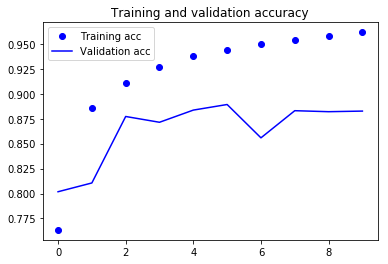

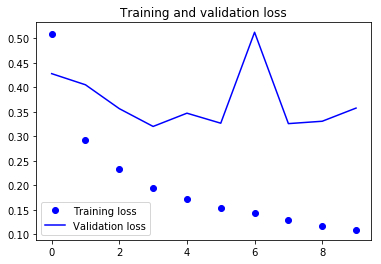

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()